In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#Create function to apply negative to charges
def negative(num):
        return -num

In [3]:
#Import CSV files, creates an Owner label for each one
brenn = pd.read_csv('./wf_brenn.csv', decimal = ",", header = None)
brenn['Owner'] = 'Brenn'
chris = pd.read_csv('./wf_chris.csv', decimal = ",", header = None)
chris['Owner'] = 'Chris'

In [4]:
# Combine dataframes into one 
frames = [chris, brenn]
combined = pd.concat(frames)
df = combined.reset_index().drop('index',axis=1)
#Rename columns
df.columns = ['Date', 'Charge', '*', 'CheckNo', 'Description', 'Owner']
df

,Date,Charge,*,CheckNo,Description,Owner
0,09/12/2018,-145.05,*,NaN,AMERICAN EXPRESS ACH PMT 180912 W8416 Christin...,Chris
1,09/12/2018,-500.00,*,NaN,AMERICAN EXPRESS ACH PMT 180911 M2716 Christin...,Chris
2,09/12/2018,-26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
3,09/12/2018,-9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
4,09/12/2018,-7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 09/10 HLU*Hulu...,Chris
5,09/12/2018,165.00,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX0655 Christ...,Chris
6,09/11/2018,-202.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 DDYAX13XEF1...,Chris
7,09/11/2018,-200.00,*,NaN,ONLINE TRANSFER TO GLYNN C EVERYDAY CHECKING X...,Chris
8,09/10/2018,-6.00,*,NaN,SAVE AS YOU GO TRANSFER DEBIT TO XXXXXXXXXXX8098,Chris
9,09/10/2018,-11.18,*,NaN,PURCHASE AUTHORIZED ON 09/08 UBER TRIP IYVTQ H...,Chris


In [5]:
# Apply negatives to all charges
df['Charge'] = df['Charge'].apply(negative)

In [6]:
df.head(10)

,Date,Charge,*,CheckNo,Description,Owner
0,09/12/2018,145.05,*,NaN,AMERICAN EXPRESS ACH PMT 180912 W8416 Christin...,Chris
1,09/12/2018,500.00,*,NaN,AMERICAN EXPRESS ACH PMT 180911 M2716 Christin...,Chris
2,09/12/2018,26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
3,09/12/2018,9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
4,09/12/2018,7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 09/10 HLU*Hulu...,Chris
5,09/12/2018,-165.00,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX0655 Christ...,Chris
6,09/11/2018,202.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 DDYAX13XEF1...,Chris
7,09/11/2018,200.00,*,NaN,ONLINE TRANSFER TO GLYNN C EVERYDAY CHECKING X...,Chris
8,09/10/2018,6.00,*,NaN,SAVE AS YOU GO TRANSFER DEBIT TO XXXXXXXXXXX8098,Chris
9,09/10/2018,11.18,*,NaN,PURCHASE AUTHORIZED ON 09/08 UBER TRIP IYVTQ H...,Chris


In [7]:
df.dtypes

Date            object
Charge         float64
*               object
CheckNo        float64
Description     object
Owner           object
dtype: object

In [8]:
#Convert Date column to a DateTime object
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y")

In [9]:
df.set_index('Date', inplace = True)
df.index.dtype

dtype('<M8[ns]')

In [10]:
df.head()

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-09-12,145.05,*,NaN,AMERICAN EXPRESS ACH PMT 180912 W8416 Christin...,Chris
2018-09-12,500.00,*,NaN,AMERICAN EXPRESS ACH PMT 180911 M2716 Christin...,Chris
2018-09-12,26.18,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX5774 Christ...,Chris
2018-09-12,9.86,*,NaN,QAPITAL INC QAPITAL IN 180912 XXXXX4124 Christ...,Chris
2018-09-12,7.99,*,NaN,RECURRING PAYMENT AUTHORIZED ON 09/10 HLU*Hulu...,Chris


In [11]:
df.tail(5)

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2017-03-27,-450.00,*,NaN,ONLINE TRANSFER FROM GLYNN C EVERYDAY CHECKING...,Brenn
2017-03-22,35.00,*,NaN,OVERDRAFT FEE FOR A TRANSACTION POSTED ON 03/2...,Brenn
2017-03-21,20.32,*,NaN,PURCHASE AUTHORIZED ON 03/20 UBER US MAR20 NN ...,Brenn
2017-03-21,35.00,*,NaN,OVERDRAFT FEE FOR A TRANSACTION POSTED ON 03/2...,Brenn
2017-03-21,35.00,*,NaN,OVERDRAFT FEE FOR A TRANSACTION POSTED ON 03/2...,Brenn


In [12]:
#DONE WITH DATA CLEANING

In [13]:
#DATA PARTITIONING

In [14]:
recurring = df[df['Description'].str.contains('RECURRING')]['2018']
#EQUINOX IS STILL ON?

In [15]:
df[ df['Description'].str.contains('ASPHALT') ]['2018']


,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-09-06,230.0,*,NaN,PURCHASE AUTHORIZED ON 09/04 ASPHALT GREEN BAT...,Brenn
2018-08-02,230.0,*,NaN,PURCHASE AUTHORIZED ON 08/01 ASPHALT GREEN BAT...,Brenn
2018-05-21,230.0,*,NaN,PURCHASE AUTHORIZED ON 05/18 ASPHALT GREEN BAT...,Brenn


In [16]:
uber = df[df['Description'].str.contains('UBER')]
uber[ uber['Owner'] == 'Brenn' ]['2018'].sum()

Charge                                                     607.4
*               ************************************************
CheckNo                                                        0
Description    PURCHASE AUTHORIZED ON 06/23 UBER TRIP ASXCJ H...
Owner          BrennBrennBrennBrennBrennBrennBrennBrennBrennB...
dtype: object

In [18]:
uber[ uber['Owner'] == 'Chris' ]['2018'].sum()

Charge                                                   2536.14
*              **********************************************...
CheckNo                                                        0
Description    PURCHASE AUTHORIZED ON 09/08 UBER TRIP IYVTQ H...
Owner          ChrisChrisChrisChrisChrisChrisChrisChrisChrisC...
dtype: object

In [19]:
internet = df[df['Description'].str.contains('OPTIMUM')]
internet

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-08-22,129.68,*,NaN,RECURRING PAYMENT AUTHORIZED ON 08/21 OPTIMUM ...,Chris
2018-08-21,-65.00,*,NaN,ONLINE TRANSFER FROM GLYNN C REF #IB04ZTFS4R E...,Chris
2018-07-23,129.49,*,NaN,RECURRING PAYMENT AUTHORIZED ON 07/21 OPTIMUM ...,Chris
2018-06-22,145.00,*,NaN,RECURRING PAYMENT AUTHORIZED ON 06/21 OPTIMUM ...,Chris
2018-05-30,10.00,*,NaN,PURCHASE AUTHORIZED ON 05/29 OPTIMUM 7836 203-...,Chris
2018-05-30,274.19,*,NaN,PURCHASE AUTHORIZED ON 05/29 OPTIMUM 7836 203-...,Chris
2018-03-12,255.12,*,NaN,PURCHASE AUTHORIZED ON 03/10 OPTIMUM 7836V 718...,Chris
2017-11-06,182.70,*,NaN,PURCHASE AUTHORIZED ON 11/04 OPTIMUM 7836V 718...,Chris
2017-08-21,10.00,*,NaN,PURCHASE AUTHORIZED ON 08/19 OPTIMUM 7836 203-...,Chris


In [20]:
venmo = df[df['Description'].str.contains('VENMO')]
venmo.sample(10)

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2017-12-26,100.0,*,NaN,VENMO PAYMENT XXXXX8836 CHRISTINA GLYNN,Chris
2017-12-19,22.0,*,NaN,VENMO PAYMENT XXXXX0136 CHRISTINA GLYNN,Chris
2017-06-26,40.0,*,NaN,VENMO PAYMENT XXXXX4005 CHRISTINA GLYNN,Chris
2018-01-24,5.0,*,NaN,VENMO PAYMENT XXXXX9604 CHRISTINA GLYNN,Chris
2018-01-02,1000.0,*,NaN,VENMO PAYMENT XXXXX2091 BRENN DAUDE,Brenn
2018-07-23,25.0,*,NaN,PURCHASE AUTHORIZED ON 07/20 VENMO 855-812-443...,Chris
2017-11-27,123.0,*,NaN,VENMO PAYMENT XXXXX9562 BRENN DAUDE,Brenn
2018-06-01,-294.5,*,NaN,VENMO CASHOUT 1115204584 CHRISTINA GLYNN,Chris
2018-06-18,50.0,*,NaN,PURCHASE AUTHORIZED ON 06/15 VENMO 855-812-443...,Chris


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


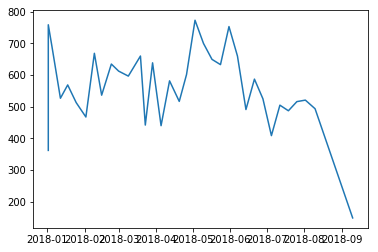

In [35]:
#Mobile deposits for Brenn
mobile_deposits = df[df['Description'].str.contains('MOBILE DEPOSIT')]
mobile_deposits['Charge'] = mobile_deposits['Charge'].apply(negative)
b_deposits = mobile_deposits[ mobile_deposits['Owner'] == 'Brenn' ]
c_deposits = mobile_deposits[ mobile_deposits['Owner'] == 'Chris' ]
plt.plot(brenn_deposits['Charge']['2018'])

In [36]:
b_deposits['Charge']

Date
2018-09-10    148.20
2018-08-10    493.29
2018-08-02    520.53
2018-07-26    515.79
2018-07-19    486.87
2018-07-12    504.59
2018-07-05    408.31
2018-06-28    524.66
2018-06-21    586.88
2018-06-14    490.77
2018-06-07    659.84
2018-05-31    752.98
2018-05-24    632.71
2018-05-17    649.32
2018-05-10    699.58
2018-05-03    772.99
2018-04-26    601.38
2018-04-20    516.50
2018-04-12    581.45
2018-04-05    439.74
2018-03-29    638.40
2018-03-23    441.67
2018-03-19    659.88
2018-03-09    596.46
2018-03-01    612.23
2018-02-23    634.55
2018-02-15    536.15
2018-02-09    668.52
2018-02-02    467.16
2018-01-25    512.65
               ...  
2017-12-22    354.55
2017-12-15    527.04
2017-12-07    525.17
2017-12-01    582.50
2017-11-24    698.52
2017-11-16    753.82
2017-11-10    832.87
2017-11-03    256.50
2017-11-02    363.42
2017-10-30     72.44
2017-10-26    625.91
2017-10-20    364.27
2017-10-12    426.68
2017-10-05    420.78
2017-09-28     30.00
2017-09-28    472.31
2017-09-

In [37]:
c_deposits

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-08-27,100.00,*,NaN,MOBILE DEPOSIT : REF NUMBER :115270715794,Chris
2018-08-20,278.83,*,NaN,MOBILE DEPOSIT : REF NUMBER :718190042404,Chris
2017-09-01,388.16,*,NaN,MOBILE DEPOSIT : REF NUMBER :817010350209,Chris
2017-08-29,450.27,*,NaN,MOBILE DEPOSIT : REF NUMBER :318260145719,Chris
2017-08-29,200.00,*,NaN,MOBILE DEPOSIT : REF NUMBER :218260145664,Chris
2017-08-29,100.00,*,NaN,MOBILE DEPOSIT : REF NUMBER :118260145563,Chris
2017-08-17,384.15,*,NaN,MOBILE DEPOSIT : REF NUMBER :416170391860,Chris
2017-08-14,239.12,*,NaN,MOBILE DEPOSIT : REF NUMBER :208120345856,Chris
2017-08-07,285.60,*,NaN,MOBILE DEPOSIT : REF NUMBER :712070323250,Chris


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


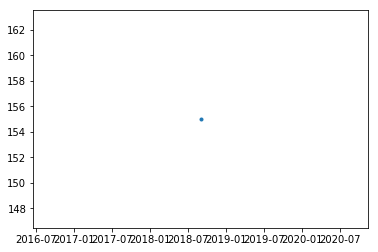

In [38]:
#Direct deposits
direct_deposits = df[df['Description'].str.contains('Payroll')]
direct_deposits['Charge'] = direct_deposits['Charge'].apply(negative)
b_direct_deposits = direct_deposits[ direct_deposits['Owner'] == 'Brenn' ]
c_direct_deposits = direct_deposits[ direct_deposits['Owner'] == 'Chris' ]
plt.plot(b_direct_deposits['Charge'], '.')

In [39]:
crypto = df[df['Description'].str.contains('COINBASE')]
crypto

,Charge,*,CheckNo,Description,Owner
Date,,,,,
2018-09-11,202.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 DDYAX13XEF1...,Chris
2018-09-04,50.00,*,NaN,COINBASE.COM/BTC 8889087930 180904 5M2SFG7VEF1...,Chris
2018-08-13,329.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 C70TIB4PEF1...,Chris
2018-08-13,63.00,*,NaN,COINBASE.COM/BTC 8889087930 SD1300 KZPMDSQ2EF1...,Chris
2017-10-17,-322.41,*,NaN,COINBASE.COM/BTC 8003435845 SD1300 3B1OIY2TEF1...,Chris
2017-10-17,-59.08,*,NaN,COINBASE.COM/BTC 8003435845 SD1300 9I357X67EF1...,Chris
2017-05-23,327.96,*,NaN,COINBASE.COM/BTC 8003435845 170522 DZ4D0D4L CH...,Chris
2017-05-23,54.41,*,NaN,COINBASE.COM/BTC 8003435845 170522 1NCFEOZ3 CH...,Chris


In [210]:
crypto['Charge'].sum()

644.88